# Análise de Imagens

In [2]:
! pip3 install tqdm

     |████████████████████████████████| 75 kB 5.1 MB/s  eta 0:00:01


In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
img = mpimg.imread("./data/images/ecovias-001.jpeg")

In [3]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

def new_image(img):
    lin = img.shape[0]
    col = img.shape[1]
    img_out = np.zeros([lin, col])
    return img_out, lin, col

def negativo(img):
    img = rgb2gray(img)
    img_out, lin, col = new_image(img)
    
    for y in tqdm(range(lin)):
        for x in range(col):
            r = img[y][x]
            img_out[y][x] = 255 - r

    return img_out

In [4]:
def impower(img, c, g):
    img = rgb2gray(img)
    img_out, lin, col = new_image(img)
    for y in tqdm(range(lin)):
        for x in range(col):
            r = img[y][x]
            img_out[y][x] = c * r**g
    
    img_out = img_out/255**g
    return img_out

In [5]:
def imlog(img):
    img = rgb2gray(img)
    img_out, lin, col = new_image(img)
    c = 1.1
    for y in tqdm(range(lin)):
        for x in range(col):
            r = img[y][x]
            img_out[y][x] = c * np.log(r + 1)

    img_out = img_out/np.log(255)
    return img_out

In [6]:
img_out_01 = negativo(img)

100%|██████████| 1080/1080 [00:01<00:00, 541.34it/s]


In [7]:
img_out_02 = impower(img, 1, 1.5)

100%|██████████| 1080/1080 [00:02<00:00, 422.00it/s]


In [8]:
img_out_03 = imlog(img)

100%|██████████| 1080/1080 [00:05<00:00, 198.57it/s]


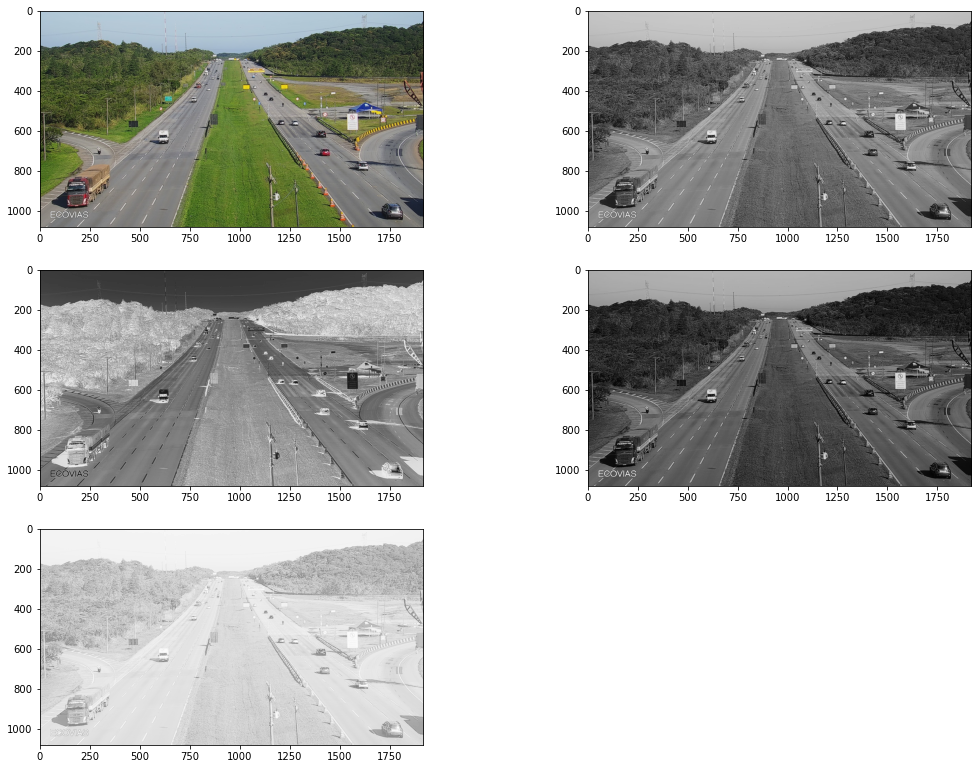

In [9]:
f = plt.figure(figsize=[18, 13.5])
f.add_subplot(3, 2, 1)
plt.imshow(img)
f.add_subplot(3, 2, 2)
plt.imshow(rgb2gray(img), cmap=plt.get_cmap("gray"))
f.add_subplot(3, 2, 3)
plt.imshow(img_out_01, cmap=plt.get_cmap("gray"))
f.add_subplot(3, 2, 4)
plt.imshow(img_out_02, cmap=plt.get_cmap("gray"))
f.add_subplot(3, 2, 5)
plt.imshow(img_out_03, cmap=plt.get_cmap("gray"))
plt.show()